<a href="https://colab.research.google.com/github/relativity-1c/relativity-1c/blob/main/Basic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

100%|██████████| 54.4M/54.4M [00:03<00:00, 14.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9


In [ ]:
train_data = pd.read_csv('/root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9/train.csv',encoding='latin1');
test_data = pd.read_csv('/root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9/test.csv',encoding='latin1');

data=  pd.concat([train_data, test_data])
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  float64
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.3+ MB


In [ ]:
df = pd.DataFrame()
df['text'] = data['text']
df['sentiment'] = data['sentiment']

df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 1, 'negative': 0}).astype(int)
df.head()

<ipython-input-7-d9f7dade3d40>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 1, 'negative': 0}).astype(int)


,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

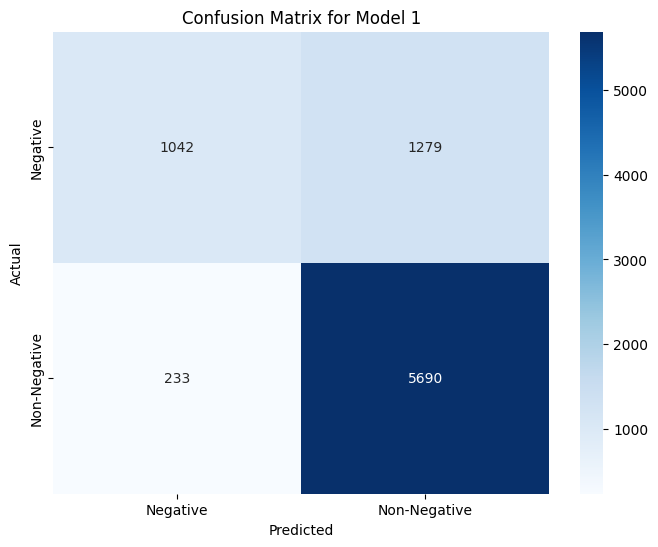

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Non-Negative'],
            yticklabels=['Negative', 'Non-Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 1')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8166
Precision: 0.8167
Recall: 0.8166
F1-Score: 0.7974


**RESULTS**

Accuracy: 80%~, good indication of model performance but doesn't speak for individual label prediction accuracy

Precision: 80%~, good, indicates low false positive rate

Recall: 80%~, good, indicates a low false negative rate

F1-Score: 80%~, good, indicates good balance between precision and recall

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Non-Negative']))

              precision    recall  f1-score   support

    Negative       0.82      0.45      0.58      2321
Non-Negative       0.82      0.96      0.88      5923

    accuracy                           0.82      8244
   macro avg       0.82      0.70      0.73      8244
weighted avg       0.82      0.82      0.80      8244



**RESULTS**

**Negative:** worse than non-negative, only 45%~ of the actual negative instances were correctly identified, only moderate balance of precision and recall and suggests the model misses a significant number of negative instances

**Non-Negative:** better of the two labels, great recall where 96%~ actual non-negative instances were correctly identified

**Notes:** Possible class imbalance

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,19699
0,7781


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
model2 = LogisticRegression(class_weight='balanced') #to balance out the classes
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

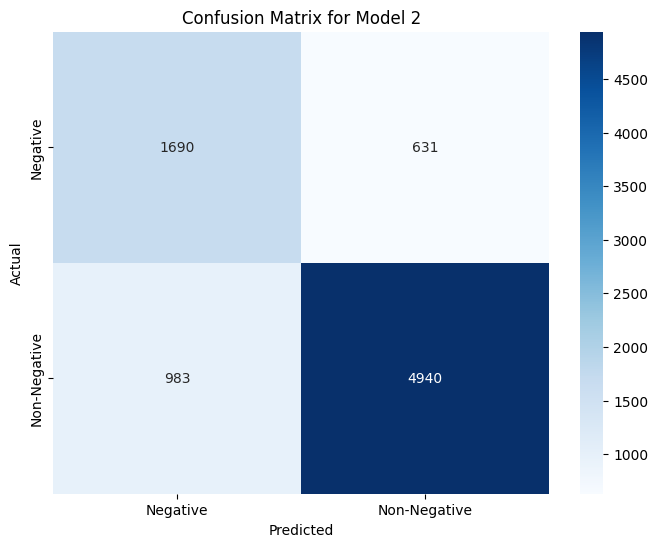

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Non-Negative'],
            yticklabels=['Negative', 'Non-Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 2')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8042
Precision: 0.8151
Recall: 0.8042
F1-Score: 0.8081


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Non-Negative']))

              precision    recall  f1-score   support

    Negative       0.63      0.73      0.68      2321
Non-Negative       0.89      0.83      0.86      5923

    accuracy                           0.80      8244
   macro avg       0.76      0.78      0.77      8244
weighted avg       0.82      0.80      0.81      8244



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df['sentiment'] = data['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0}).astype(int)
df.head()

<ipython-input-18-b738e22c3936>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = data['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0}).astype(int)


,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,11117
2,8582
0,7781


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['text'] = df['text'].apply(word_tokenize)
df['text'] = df['text'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [ ]:
model3 = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced') #to balance out the classes
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


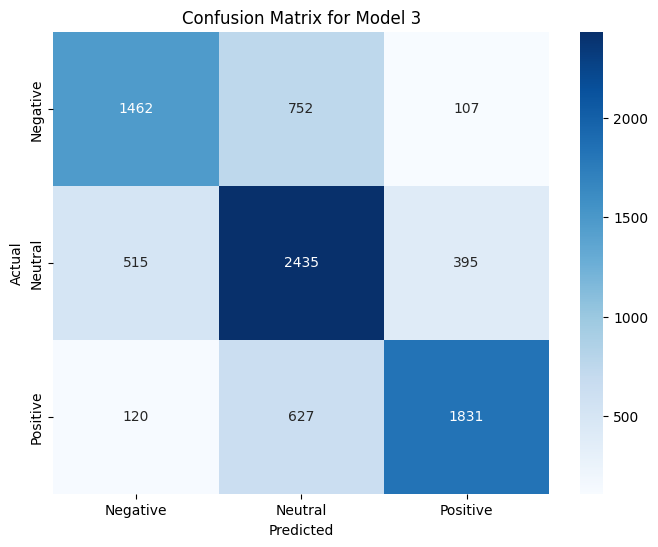

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 3')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.6948
Precision: 0.7008
Recall: 0.6948
F1-Score: 0.6955


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Positive', 'Neutral','Negative']))

              precision    recall  f1-score   support

    Positive       0.70      0.63      0.66      2321
     Neutral       0.64      0.73      0.68      3345
    Negative       0.78      0.71      0.75      2578

    accuracy                           0.69      8244
   macro avg       0.71      0.69      0.70      8244
weighted avg       0.70      0.69      0.70      8244



In [ ]:
#redo  cuz it didnt work without
vectorizer = TfidfVectorizer()
X_full = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(X_full, df['sentiment'], test_size=0.3, random_state=123)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

X_transformed = vectorizer.transform(df['text'])
sentiment_strengths = []

for text_vector in X_transformed:
    proba = model1.predict_proba(text_vector)[0]
    # calculate strength (e.g., using max probability)
    strength = np.max(proba)
    # adjust sign based on sentiment
    sign = 1 if np.argmax(proba) == 2 else -1 if np.argmax(proba) == 0 else 0
    sentiment_strengths.append(sign * strength)

df['sentiment_strength'] = sentiment_strengths

count    27480.000000
mean         0.041673
std          0.504705
min         -0.999811
25%          0.000000
50%          0.000000
75%          0.464345
max          0.999958
Name: sentiment_strength, dtype: float64


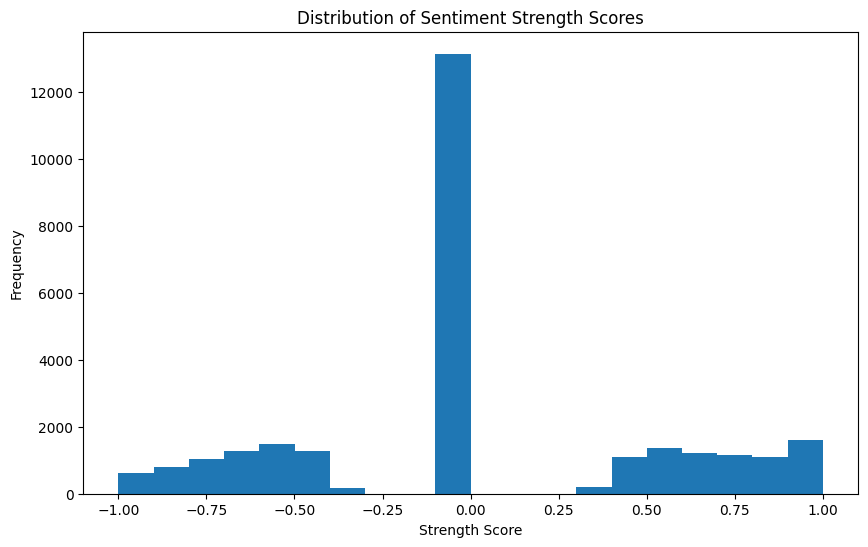

In [ ]:

print(df['sentiment_strength'].describe())

plt.figure(figsize=(10,6))
plt.hist(df['sentiment_strength'], bins=20)
plt.title('Distribution of Sentiment Strength Scores')
plt.xlabel('Strength Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def interpret_sentiment_strength(score):
    if score > 0.5:
        return "Very Positive"
    elif 0 < score <= 0.5:
        return "Somewhat Positive"
    elif score == 0:
        return "Neutral"
    elif -0.5 < score < 0:
        return "Somewhat Negative"
    else:
        return "Very Negative"

# apply interpretation
df['sentiment_interpretation'] = df['sentiment_strength'].apply(interpret_sentiment_strength)

print(df[['text', 'sentiment_strength', 'sentiment_interpretation']].head())

                                                text  sentiment_strength  \
0             I ` d have responded , if I were going            0.000000   
1   Sooo SAD I will miss you here in San Diego ! ! !           -0.948008   
2                         my boss is bullying me ...           -0.549459   
3                    what interview ! leave me alone           -0.518239   
4  Sons of * * * * , why couldn ` t they put them...           -0.421281   

  sentiment_interpretation  
0                  Neutral  
1            Very Negative  
2            Very Negative  
3            Very Negative  
4        Somewhat Negative  


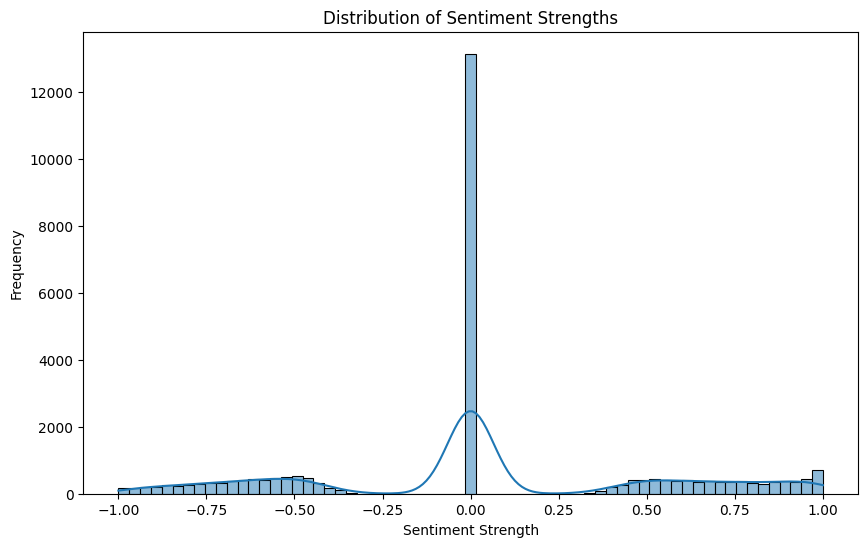

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_strength'], kde=True)
plt.title('Distribution of Sentiment Strengths')
plt.xlabel('Sentiment Strength')
plt.ylabel('Frequency')
plt.show()